In [1]:
# Questi comandi permettono di usare in Jupyter le librerie di R presenti nel CRAN (Comprehensive R Archive Network)
country.code <- 'it'
url.pattern <- 'https://'  
repo.data.frame <- subset(getCRANmirrors(), CountryCode == country.code & grepl(url.pattern, URL))
options(repos = repo.data.frame$URL)

In [2]:
# Package utili: ltm per le funzioni di stima dei parametri e readxl per poter leggere file excel
install.packages("readxl")
install.packages("ltm")

package 'readxl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Marco\AppData\Local\Temp\Rtmp46sCc4\downloaded_packages
package 'ltm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Marco\AppData\Local\Temp\Rtmp46sCc4\downloaded_packages


In [3]:
# Importo i package
library("readxl")
library("ltm")

Warning message:
"package 'readxl' was built under R version 3.4.2"Warning message:
"package 'ltm' was built under R version 3.4.2"Loading required package: MASS
Loading required package: msm
Loading required package: polycor


In [4]:
#' Legge un file csv e imposta la prima colonna con i nomi degli studenti come indici della tabella 
#'
#' @param path Percorso del file
#' @return data frame corrispondente al file csv indicato
#' @examples
#' readCSV("file.csv")
#'
#' readCSV("C:/Users/file.csv")
readCSV <- function(path) {
  read.csv(path, row.names = 1)
}

#' Legge un file excel e imposta la prima colonna con i nomi degli studenti come indici della tabella 
#'
#' @param path Percorso del file
#' @return data frame corrispondente al file excel indicato
#' @examples
#' readEXCEl("file.xlsx")
#'
#' readEXCEl("C:/Users/file.xlsx")
readEXCEl <- function(path) {
    items <- read_excel(path)
    items <- as.data.frame(items)
    rownames(items) <- items[,1]
    items <- items[,-1]
    items
}

In [5]:
# Importo la tabella dicotomica
datiDichot <- readEXCEl("EsameDic.xlsx")
datiDichot

,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10
S1,0,0,0,0,0,0,0,0,0,0
S2,1,1,1,1,1,1,1,1,1,1
S3,1,1,1,1,0,1,1,1,1,0
S4,1,1,1,1,1,1,1,1,1,0
S5,1,0,1,1,1,1,1,0,0,1
S6,0,1,1,1,1,0,0,1,1,0
S7,1,1,0,0,1,1,1,0,0,0
S8,1,1,1,1,0,1,1,1,1,1
S9,1,1,1,1,1,0,1,1,1,0
S10,0,0,1,1,1,0,0,1,0,1


In [79]:
#' Modifica la dimensione dei grafici
#'
#' @param width Larghezza dei grafici
#' @param height Altezza dei grafici
#' @examples
#' width <- 7
#' height <- 5
#' sizePlot(width, height)
sizePlot <- function(width, height) {
    options(repr.plot.width = width, repr.plot.height = height)
}

#' Rimpiazza i valori NA presenti nella tabella passata con 0
#'
#' @param items Tabella dicotomica avente una riga per studente e una colonna per esercizio
#' @return Tabella dicotomica avente una riga per studente e una colonna per esercizio a cui sono stati sostituiti i NA con 0
#' @examples
#' items <- readEXCEl("file.xlsx")
#' replaceNaWithZero(items)
replaceNaWithZero <- function(items) {
    aux <- items
    aux[is.na(aux)] <- 0
    aux
}

#' Stima le difficoltà degli esercizi senza porre vincoli sul valore del discriminante
#'
#' @param items Tabella dicotomica avente una riga per studente e una colonna per esercizio
#' @param forNA Definisce il comportamento in caso di NA, di default è NULL quindi vengono rimossi prima della computazione, 
#' se si usasse forNA = na.exclude la stima verrebbe effettuata eliminando le righe in cui è presente almeno un NA
#' @return Vettore di difficoltà stimate
#' @examples
#' items <- readEXCEl("file.xlsx")
#' estimateDifficultiesDichotFreeDiscrim(items)
estimateDifficultiesDichotFreeDiscrim <- function(items, forNA = NULL) {
    param <- rasch(items, na.action = forNA)
    tab <- coef(param)
    array(tab[,"Dffclt"])
}

#' Stima le difficoltà degli esercizi ponendo il discriminante ad 1
#'
#' @param items Tabella dicotomica avente una riga per studente e una colonna per esercizio
#' @param forNA Definisce il comportamento in caso di NA, di default è NULL quindi vengono rimossi prima della computazione, 
#' se si usasse forNA = na.exclude la stima verrebbe effettuata eliminando le righe in cui è presente almeno un NA
#' @return Vettore di difficoltà stimate
#' @examples
#' items <- readEXCEl("file.xlsx")
#' estimateDifficultiesDichotOneDiscrim(items)
estimateDifficultiesDichotOneDiscrim <- function(items,  forNA = NULL) {
    param <- rasch(items, constraint = cbind(ncol(items) + 1, 1), na.action = forNA)
    tab <- coef(param)
    array(tab[,"Dffclt"])
}

#' Genera un grafico per mostrare il livello di difficoltà di ciascun esercizio 
#'
#' @param items Tabella dicotomica avente una riga per studente e una colonna per esercizio
#' @param diff Vettore di difficoltà
#' @param color Colore del grafico, di default è rosso
#' @examples
#' items <- readEXCEl("file.xlsx")
#' diff <- estimateDifficultiesDichotOneDiscrim(items)
#' plotDifficultiesDichot(items, diff)
plotDifficultiesDichot <- function(items, diff, color = "red", name = "Difficulties plot") {
    nItems <- length(diff)
    plot(diff,xlim=c(1,nItems),ylim=c(-5,5),type="b",main=name,xlab="Items",ylab="Difficulty",xaxt="n",col=color,pch=16,lwd=2)
    axis(1, at=1:nItems, labels=colnames(items))
    par(new = TRUE)
    plot(diff + 4.7, type = "h", xlim = c(1,nItems),ylim = c(0,10), xaxt='n', yaxt = "n", xlab = "", ylab = "", lty = 2)
}

#' Stima le abilità degli studenti
#'
#' @param items Tabella dicotomica avente una riga per studente e una colonna per esercizio
#' @return Vettore di abilità stimate
#' @examples
#' items <- readEXCEl("file.xlsx")
#' estimateAbilitiesDichot(items)
estimateAbilitiesDichot <- function(items) {
    fit <- rasch(items)
    fs <- factor.scores(fit, resp.patterns = items)
    array(unlist(fs$score.dat["z1"]))
}

#' Genera un istogramma per mostrare il livello di abilità degli studenti e la relativa quantità
#'
#' @param abil Vettore di abilità
#' @param start Primo valore sull'asse x
#' @param end Ultimo valore sull'asse x
#' @param by Intervallo tra le celle dell'istogramma 
#' @examples
#' items <- readEXCEl("file.xlsx")
#' abil <- estimateAbilitiesDichot(items)
#' plotDifficultiesDichot(abil)
plotAbilitiesDichot <- function(abil, start, end, by) {
    hist(abil,main="Ability histogram",xlab="Ability",ylab="Students",breaks=seq(start,end,by),xlim=c(start,end),col="royalblue3")
    axis(1, at=seq(start, end, by), labels=seq(start, end, by))        
}

In [80]:
#' Attraverso la tecnica di bootstrapping seleziona randomicamente n righe dalla matrice dicotomica, questa funzione è utlile 
#' se si dispone di pochi soggetti perchè in caso di una scarsa quantità di osservazioni lo stimatore potrebbe non covergere
#'
#' @param items Tabella dicotomica avente una riga per studente e una colonna per esercizio
#' @param n Numero di estrazioni
#' @return Data frame di difficoltà stimate dalla tabella generata dalle estrazioni casuali
#' @examples
#' items <- readEXCEl("file.xlsx")
#' bootstrapping(items)
bootstrapping <- function(items, n = 500) {
    idxs <- sample(1:nrow(items), n, replace = TRUE)
    items[idxs,]
}

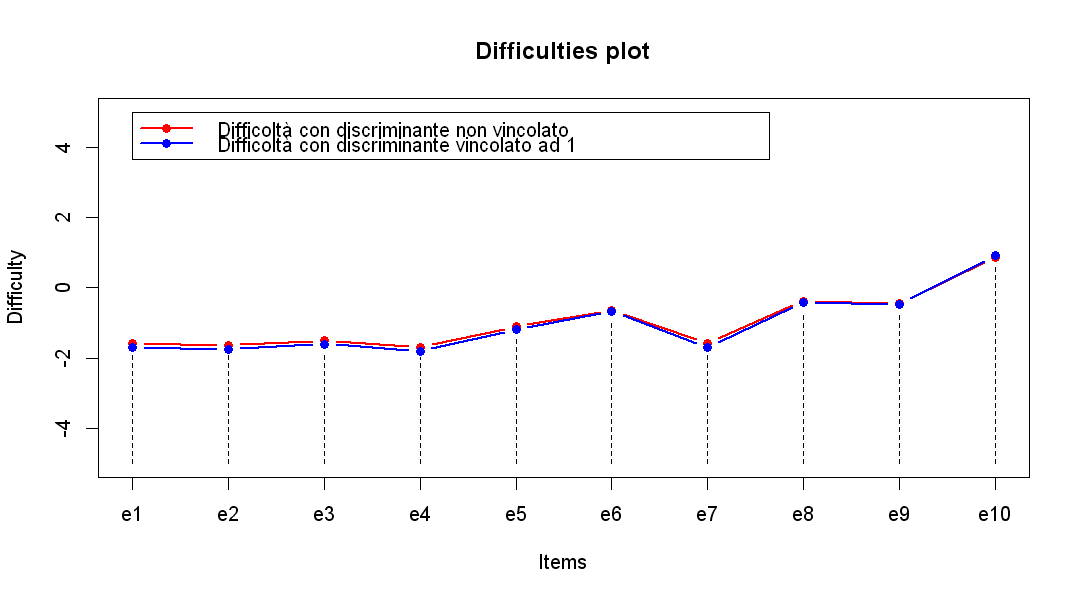

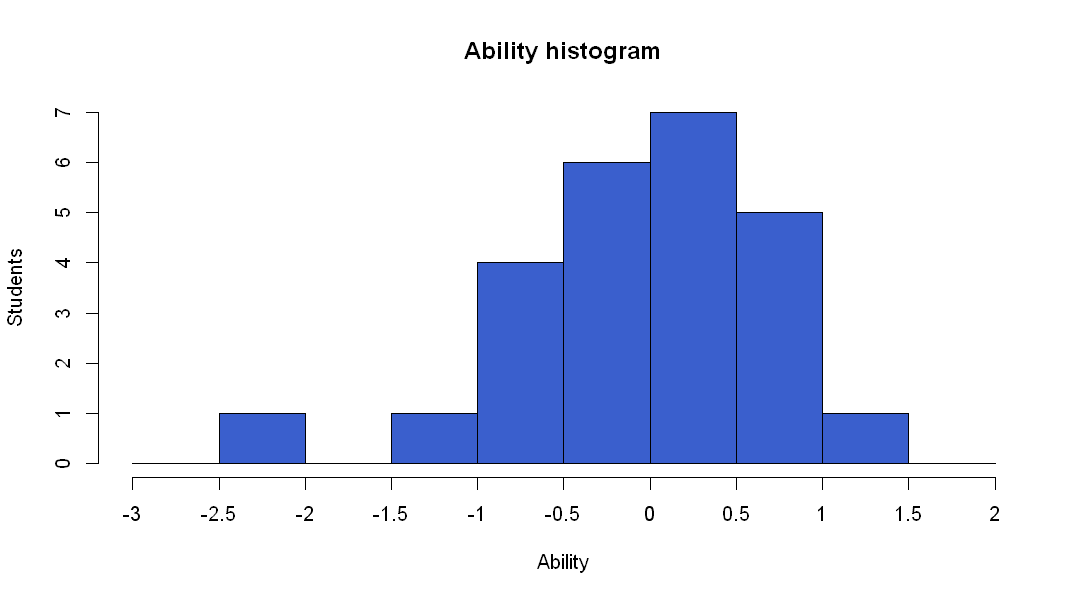

In [90]:
# Modifico la dimensione dei grafici
width <- 9
height <- 5
sizePlot(width, height)

# Bootstrapping
numExtractions <- 300
bottDatiDichot <- bootstrapping(datiDichot, numExtractions)

# Stimo le difficoltà con entrambi i metodi
difficDichotF <- estimateDifficultiesDichotFreeDiscrim(bottDatiDichot)
difficDichotO <- estimateDifficultiesDichotOneDiscrim(bottDatiDichot)

# Visualizzo e confronto i grafici relativi alle difficoltà stimate con entrambi i metodi
plotDifficultiesDichot(datiDichot, difficDichotF)
par(new = TRUE)
plotDifficultiesDichot(datiDichot, difficDichotO, color = "blue")
legend(1, 10, legend=c("Difficoltà con discriminante non vincolato", "Difficoltà con discriminante vincolato ad 1"), col=c("red", "blue"), lty=1, cex=1, lwd=2, pch=16)

# Stimo le abilità e visualizzo il relativo grafico
abil <- estimateAbilitiesDichot(datiDichot)
plotAbilitiesDichot(abil, start = -3, end = 2, by = 0.5)

In [91]:
#' Calcola la probabilità che uno studente risolva correttamente un esercizio
#'
#' @param ability Abilità dello studente
#' @param difficulty Difficoltà dell'esercizio
#' @return Probabilità di rispondere correttamente, compresa tra 0 e 1
#' @examples
#' ability <- 2
#' difficulty <- 1
#' pl1(ability, difficulty)
pl1 <- function(ability, difficulty) {
    exp(ability - difficulty) / (1 + exp(ability - difficulty))
}

#' Determina la probabilità per ogni studente di risolvere correttamente ogni esercizio
#'
#' @param items Tabella dicotomica avente una riga per studente e una colonna per esercizio
#' @param diff Vettore di difficoltà
#' @param abil Vettore di abilità
#' @return Data frame di probabilità
#' @examples
#' items <- readEXCEl("file.xlsx")
#' diff <- estimateDifficultiesDichotFreeDiscrim(items)
#' abil <- estimateAbilitiesDichot(items)
#' calcProbabilites(items, diff, abil)
calcProbabilites <- function(items, diff, abil) {   
    probDf <- items
    namesCol <- names(probDf)
    namesRow <- row.names(probDf)
    j <- 1
    for (row in namesRow) {
        i <- 1
        for (col in namesCol) {
            prob <- pl1(abil[j],diff[i])
            probDf[row,col] <- prob          
            i <- i + 1
        }
        j <- j + 1
    }
    probDf
}


#' Migliora la lettura della tabella delle probabilità per l'utente
#'
#' @param df Data frame di probabilità, output della funzione calcProbabilites
#' @return Data frame di probabilità da 0 a 100
#' @examples
#' items <- readEXCEl("file.xlsx")
#' diff <- estimateDifficultiesDichotFreeDiscrim(items)
#' abil <- estimateAbilitiesDichot(items)
#' dfProb <- calcProbabilites(items, diff, abil)
#' showProbabilities(dfProb)
showProbabilities <- function(df){
    aux <- trunc(df*100)
    aux <- data.frame(lapply(aux, function(p) paste(p, "%")))
    row.names(aux) <- row.names(df)
    aux
}

In [92]:
# Calcolo la tabella di probabilità che ogni studente risponda correttamente ad ogni test usando il discriminante non vincolato
dfProbF <- calcProbabilites(datiDichot, difficDichotF, abil)

# Visualizzo la tabella più semplicemente
showProbabilities(dfProbF)

,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10
S1,31 %,32 %,29 %,33 %,21 %,14 %,31 %,11 %,12 %,3 %
S2,94 %,94 %,93 %,94 %,90 %,86 %,94 %,82 %,83 %,58 %
S3,86 %,87 %,85 %,87 %,80 %,71 %,86 %,66 %,67 %,36 %
S4,90 %,91 %,90 %,91 %,86 %,79 %,90 %,74 %,75 %,46 %
S5,82 %,82 %,80 %,83 %,73 %,63 %,82 %,57 %,59 %,28 %
S6,76 %,77 %,74 %,78 %,66 %,55 %,76 %,48 %,50 %,21 %
S7,69 %,70 %,67 %,71 %,58 %,47 %,69 %,40 %,42 %,16 %
S8,90 %,91 %,90 %,91 %,86 %,79 %,90 %,74 %,75 %,46 %
S9,86 %,87 %,85 %,87 %,80 %,71 %,86 %,66 %,67 %,36 %
S10,69 %,70 %,67 %,71 %,58 %,47 %,69 %,40 %,42 %,16 %


In [93]:
#' Genera una tabella dicotomica
#'
#' @param diff vettore di difficoltà scelte
#' @param abil vettore di abilità scelte
#' @return La tabella dicotomica generata
#' @examples
#' numItems <- 10
#' numStudents <- 30
#' diffInit <- rnorm(numItems)
#' abil <- rnorm(numStudents)
#' generateDichot(diffInit, abil)
generateDichot <- function(diff, abil) {
    items <- data.frame(matrix(0, ncol = length(diff), nrow = length(abil)))
    prob <- calcProbabilites(items, diff, abil)
    namesCol  <- names(items)
    namesRow  <- row.names(items)
    for (row in namesRow) {
        for (col in namesCol) {
            items[row,col] <- rbinom(1, 1, prob[row,col])         
        }
    }    
    items
}

#' Valuta la bontà del mio stimatore misurando lo scostamento tra le difficoltà o le abilità passate per argomento
#'
#' @param vect1 vettore di difficoltà o abilità
#' @param vect2 vettore di difficoltà o abilità
#' @return Data frame con le difficoltà o abilità passate per argomento e lo scostamento rilevato
#' @examples
#' numItems <- 10
#' numStudents <- 30
#' bootStrapVal <- 10
#' diffInit <- rnorm(numItems)
#' abil <- rnorm(numStudents)
#' genDic <- generateDichot(diffInit, abil)
#' genDicBoot <- bootstrapping(genDic, numStudents * bootStrapVal)
#' diffEstim <- estimateDifficultiesDichotFreeDiscrim(genDicBoot)
#' validationWithDifference(diffInit, diffEstim)
validationWithDifference <- function(vect1, vect2) { 
    scost <- abs(unlist(lapply(vect1 - vect2 , round, 2)))
    compare <- data.frame(vect1, vect2, scost)   
    colnames(compare) <- c("Vettore 1","Vettore 2", "Scostamento")
    compare
}

#' Valuta la bontà del mio stimatore confrontando graficamente le difficoltà o le abilità passate per argomento
#'
#' @param vect1 Vettore di difficoltà o abilità
#' @param vect2 Vettore di difficoltà o abilità
#' @param label1 Descrizione del vettore 1
#' @param label2 Descrizione del vettore 2
#' @examples
#' numItems <- 10
#' numStudents <- 30
#' bootStrapVal <- 10
#' diffInit <- rnorm(numItems)
#' abil <- rnorm(numStudents)
#' genDic <- generateDichot(diff, abil)
#' genDicBoot <- bootstrapping(genDic, numStudents * bootStrapVal)
#' diffEstim <- estimateDifficultiesDichotFreeDiscrim(genDicBoot)
#' validationWithPlot(diffInit, diffEstim)
validationWithPlot <- function(vect1, vect2, label1 = "Vettore 1", label2 = "Vettore 2") {
    plot(vect1,xlim=c(1,length(vect1)),ylim=c(-4,4),type="b",main="Comparison plot",xlab="Observations",ylab="Values",xaxt="n",col="red",pch=16,lwd=2)
    axis(1, at = 1:length(vect1), labels = 1:length(vect1))
    par(new = TRUE)
    plot(vect2, type = "b", xlim = c(1,length(vect2)),ylim = c(-4,4), xaxt='n', yaxt = "n", xlab = "", ylab = "", col = "blue", pch=16, lwd=2)
    legend(1, 4, legend=c(label1, label2), col=c("red", "blue"), lty=1, cex=1, lwd=2, pch=16)
    NULL
}

#' Valuta la bontà del mio stimatore calcolando il coefficiente di correlazione lineare
#'
#' @param vect1 vettore di difficoltà o abilità
#' @param vect2 vettore di difficoltà o abilità
#' @return Valore numerico compreso tra -1 e 1: se si avvicina a -1 i dati sono correlati negativamente, se si avvicina ad 1 
#' i dati sono correlati positivamente e se è un valore vicino a 0 allora non vi è alcun tipo di correlazione lineare
#' @examples
#' numItems <- 10
#' numStudents <- 30
#' bootStrapVal <- 10
#' diffInit <- rnorm(numItems)
#' abil <- rnorm(numStudents)
#' genDic <- generateDichot(diff, abil)
#' genDicBoot <- bootstrapping(genDic, numStudents * bootStrapVal)
#' diffEstim <- estimateDifficultiesDichotFreeDiscrim(genDicBoot)
#' validationWithCor(diffInit, diffEstim)
validationWithCor <- function(vect1, vect2) {
    cor(vect1, vect2)
}


#' Funzione che permette di generare, stimare, validare e, se richiesto, estendere la tabella generata dagli input
#'
#' @param diff Vettore di difficoltà 
#' @param abil Vettore di abilità 
#' @param generator Funzione generatrice della tabella
#' @param estimator Funzione di stima della difficoltà o abilità della tabella generata
#' @param validator Funzione per fornire un indicatore della bontà dello stimatore
#' @param increaseTable Funzione opzionale di incremento della tabella su cui applicare lo stimatore
#' @param valid Indica se il validatore deve essere applicato sulla difficoltà o l'abilità
#' @return Lista contenente la tabella generata, le difficoltà o abilità stimate e output del validatore 
#' @examples
#' numItems <- 10
#' numStudents <- 30
#' bootStrapVal <- 10
#' diffInit <- rnorm(numItems)
#' abil <- rnorm(numStudents)
#' simulate(diffInit, abil, generateDichot, estimateDifficultiesDichotOneDiscrim, validationWithPlot, bootstrapping)
#' simulate(diffInit, abil, generateDichot, estimateAbilitiesDichot, validationWithPlot, diffOrAb = "abil")
simulate <- function(diff, abil, generator, estimator, validator, increaseTable = function(df) df, diffOrAb = "diff") {
    tabDichot <- generator(diff, abil)
    tabDichotBoot <- increaseTable(tabDichot)  
    estim <- estimator(tabDichotBoot)
    
    if(diffOrAb == "diff"){        
        valid <- validator(diff, estim)
    }
    else if(diffOrAb == "abil"){        
        valid <- validator(abil, estim)
    }
    
    list(tabDichot, estim, valid)
}

In [94]:
# Definisco il numero di items, il numero di studenti ed quante estrazioni effettuare rispetto al numero di studenti
numItems <- 10
numStudents <- 30 
bootStrapVal <- 15

# Genero randomicamente difficolà e abilità
diff <- rnorm(numItems)
abil <- rnorm(numStudents)

# Genero la tabella dicotomica e vi applico il bootstrapping
genDic <- generateDichot(diff, abil)
genDicBoot <- bootstrapping(genDic, numStudents * bootStrapVal)

# Stimo le difficoltà con entrambi i metodi
esDiffO <- estimateDifficultiesDichotOneDiscrim(genDicBoot)
esDiffF <- estimateDifficultiesDichotFreeDiscrim(genDicBoot)
esAbil <- estimateAbilitiesDichot(genDicBoot)

NULL

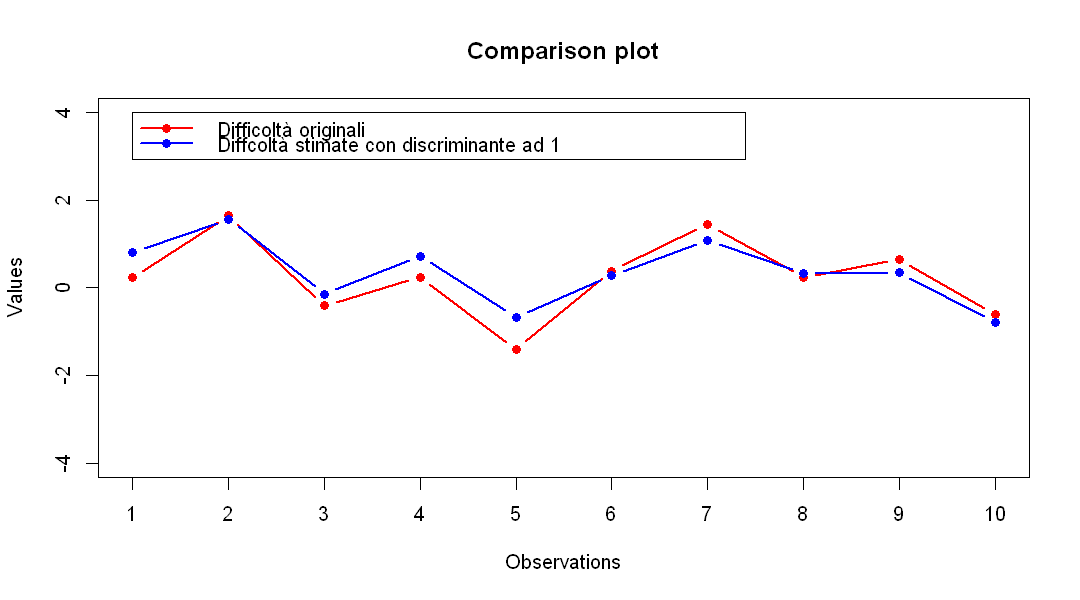

NULL

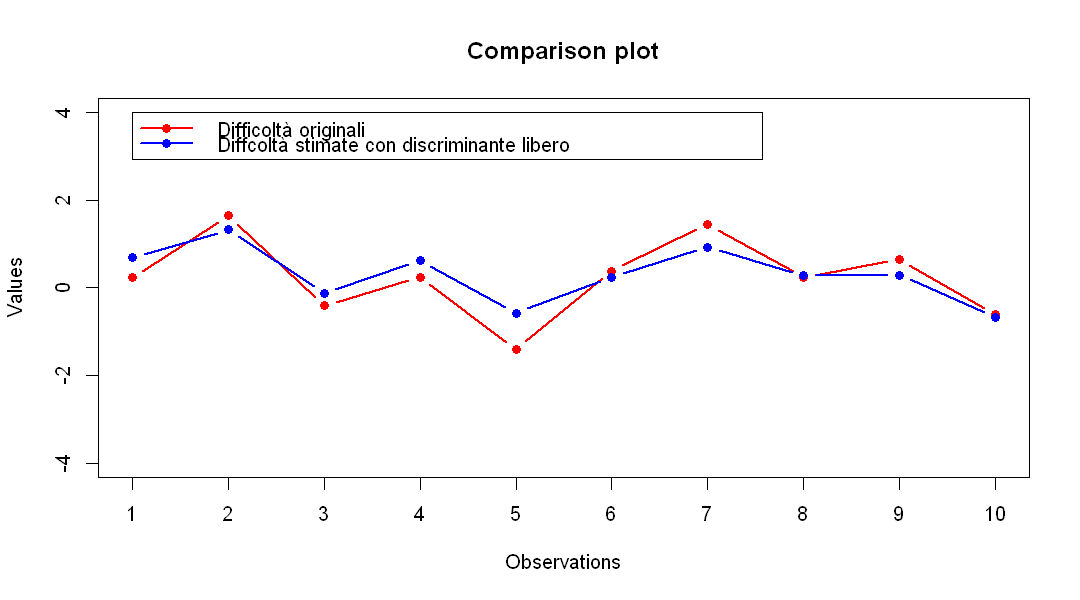

NULL

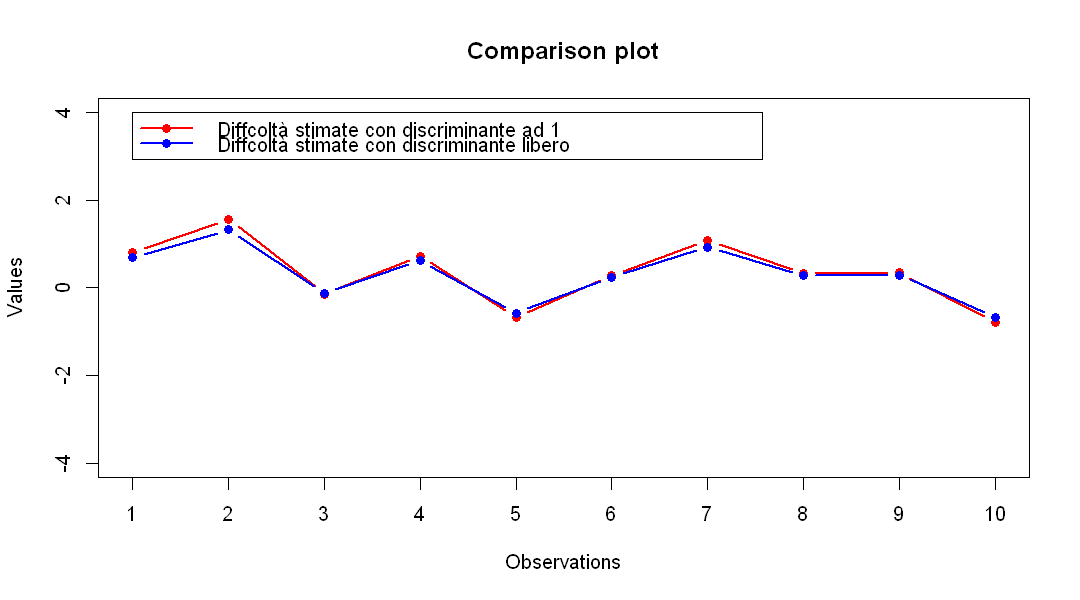

In [95]:
# Confronto le difficoltà iniziali e quelle stimate fissando il discriminante ad 1
validationWithPlot(diff, esDiffO, "Difficoltà originali", "Diffcoltà stimate con discriminante ad 1")

# Confronto le difficoltà iniziali e quelle stimate senza fissare il discriminante
validationWithPlot(diff, esDiffF, "Difficoltà originali", "Diffcoltà stimate con discriminante libero")

# Confronto le difficoltà stimate fissando il discriminante ad 1 con quelle stimate senza fissarlo
validationWithPlot(esDiffO, esDiffF, "Diffcoltà stimate con discriminante ad 1", "Diffcoltà stimate con discriminante libero")

In [96]:
#' Sostituisce alcuni 0 con NA nella tabella passata simulando che alcuni studenti invece di consegnare un esercizio sicuramente
#' errato hanno invece deciso di astenersi
#'
#' @param items Tabella dicotomica avente una riga per studente e una colonna per esercizio
#' @param prob Probabilità con cui decidere se sostituire uno 0 in NA, se è 0 nessuno verrà sostituito e se è 1 tutti verranno
#' sostituiti, di default è il 30%
#' @return Data frame nella quale sono avvenute le sostituizioni 
#' @examples
#' p <- 0.3
#' items <- readEXCEl("file.xlsx")
#' replaceRandomZeroWithNA(items, p)
replaceRandomZeroWithNA <- function(items, prob = 0.3) {   
    df <- items
    namesCol <- names(df)
    namesRow <- row.names(df)
    for (row in namesRow) {
        for (col in namesCol) {
            if(df[row,col] == 0){
                p <- runif(1)
                if(prob > p){
                    df[row,col] = NA
                }
            }                
        }
    }
    df
}

In [97]:
# Definisco il numero di items, numero di studenti, quante estrazioni effettuare e la probabilità di rimpiazzare gli 0 con NA
numItems <- 10
numStudents <- 30
bootStrapVal <- 30
prob <- 0.2

# Genero randomicamente difficolà e abilità
diff <- rnorm(numItems)
abil <- rnorm(numStudents)

# Genero la tabella dicotomica e vi appli il bootstrapping
gd <- generateDichot(diff, abil)
gdNA <- replaceRandomZeroWithNA(gd, prob)
gdNA <- bootstrapping(gdNA, numStudents * bootStrapVal)

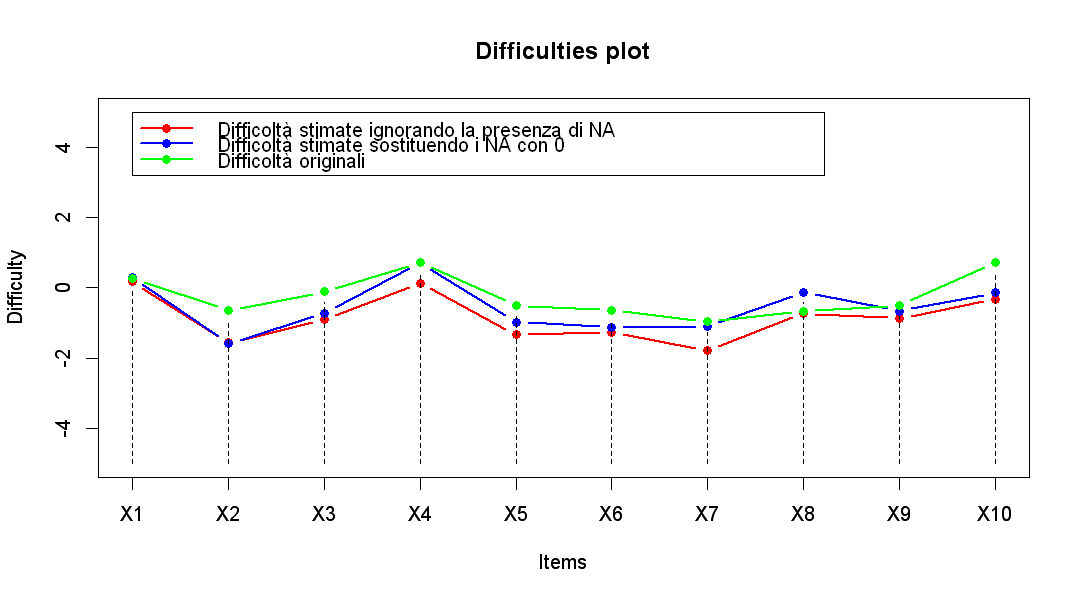

In [121]:
estDiffNULL <- estimateDifficultiesDichotOneDiscrim(gdNA)
estDiffZero <- estimateDifficultiesDichotOneDiscrim(replaceNaWithZero(gdNA))

# Visualizzo e confronto i grafici relativi alle difficoltà stimate nei 2 modi: mantenendo i NA e ignorandoli e sostituendoli con 0
plotDifficultiesDichot(gdNA, estDiffNULL)
par(new = TRUE)
plotDifficultiesDichot(gdNA, estDiffZero, color = "blue")
par(new = TRUE)
plotDifficultiesDichot(gdNA, diff, color = "green")
legend(1, 10, legend=c("Difficoltà stimate ignorando la presenza di NA", "Difficoltà stimate sostituendo i NA con 0", "Difficoltà originali"), col=c("red", "blue", "green"), lty=1, cex=1, lwd=2, pch=16)

In [99]:
#' Produce una matrice dicotomica definendo la condizione per cui un esercizio viene definito come passato(1) oppure no(0)
#' @param session Sessione considerata
#' @param vote Stringa che indica come valutare gli esercizi
#' @param maxError Se scelto il criterio "errors", questo campo indica il massimo numero di errori commettibili
#' @param percTestCaseOk Se scelto il criterio "testCase", questo campo indica la percentuale di test case che devono 
#' essere corretti rispetto al totale
#' @param keepNA Paramatreo booleano per indicare se indicare con NA i voti in cui gli studenti non hanno raggiunto la votazione
#' precedente al paramentro di valutazione indicato (es. evaluateSource(session, vote = "compiles", keepNA = TRUE), i voti
#' NA riguarderanno gli studenti che non hanno raggiunto lo step precedente, cioè l'upload)
#' @return Data frame dicotomico, possiede una riga per studente e una colonna per esercizio, nelle intersezioni vi sono i 
#' risultati delle valutazioni sulla base delle specifiche inserite
#' @examples
#' sourceData <- "data.R"      
#' source(sourceData)
#' numSessions <- 5
#' session <- sessions[numSessions]
#' vote <- "testCase"
#' p <- 0.5
#' evaluateSource(session, vote, percTestCaseOk = p)             
evaluateSource <- function(session, vote, maxError, percTestCaseOk, keepNA = FALSE) {      
    results <- get(paste("results_", session, sep = ""))
    
    if(vote == "uploaded")
        results[,,vote]
    else if(vote == "compiles"){
        dfC <- results[,,vote]
        dfU <- results[,,"uploaded"]
        
        if(keepNA)
            dfC[dfU == 0] <- NA   
        dfC
    }
    else if(vote == "errors"){
        df <- results[,,vote]
        df[df <= maxError] <- 1 
        df[df > maxError] <- 0
        
        if(!keepNA)
            df[is.na(df)] <- 0            
        df
    }
    else if(vote == "testCase"){
        cases <- get(paste("cases_", session, sep = ""))
        df <- results[,,"oks"]
        df <- t((t(df)) / c(cases)) 
        df[df >= percTestCaseOk] <- 1
        df[df < percTestCaseOk] <- 0
        
        if(!keepNA)
            df[is.na(df)] <- 0     
        df
    }        
}

In [124]:
#' Modifica i valori fuori scala nel caso la funzione non convergesse sostituendoli con il massimo o il minimo
#' @param vect Vettore di difficoltà
#' @param min Difficoltà minima
#' @param max Difficoltà massima
#' @return Vettore di difficoltà
#' @examples
#' sourceData <- "data.R"      
#' source(sourceData)
#' numSessions <- 5
#' session <- sessions[numSessions]
#' vote <- "testCase"
#' p <- 0.5
#' numExtraction <- 200
#' min <- -4
#' max <- 4
#' evalWithTestCase <- evaluateSource(session, vote, percTestCaseOk = p)      
#' diffTestCase <- estimateDifficultiesDichotOneDiscrim(bootstrapping(evalWithTestCase, numExtraction))
#' regulateRange(diffTestCase, min, max)
regulateRange <- function(vect, min, max){      
    vect[vect > max] <- max
    vect[vect < min] <- min
    vect
}

In [177]:
sourceData <- "data.R"
source(sourceData)
bootstrapVal <- 10

cat("Di seguito andremmo ad analizzare i risultati degli esami di programmazione, quindi ogni esercizio verrà considerato 
superato solo se almeno il 50% dei test case ad esso associati sarà ritenuto corretto, in esame non sono ritenuti generalmente 
corretti gli esercizi solo perchè è stato effettuato il loro upload, compilano o semplicemente perchè non presentano errori
di esecuzione")

Di seguito andremmo ad analizzare i risultati degli esami di programmazione, quindi ogni esercizio verrà considerato 
superato solo se almeno il 50% dei test case ad esso associati sarà ritenuto corretto, in esame non sono ritenuti generalmente 
corretti gli esercizi solo perchè è stato effettuato il loro upload, compilano o semplicemente perchè non presentano errori
di esecuzione

La stima delle difficoltà rileva problemi di convergenza, in quanto è possibile rilevare colonne in cui la presenza di 0 
è totale o quasi, come mostrato di seguito:

,01-censura_la_prima,02-studiare_stanca,03-piramide_di_numeri,04-disegna_serpente,05-stampante_configurabile,06-righello_orizzontale
828035,0,0,0,0,0,0
840537,1,0,0,0,0,0
858673,1,1,1,1,0,0
871599,0,0,0,0,0,0
871806,1,1,1,1,0,0
872868,0,0,0,0,0,0
873489,1,1,0,0,0,0
874225,0,0,0,0,0,0
885299,1,0,0,1,0,0
885432,1,0,0,0,0,0


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"




Nonostante il warning generato la funzione effettua ugualmente una stima delle difficoltà, se essa è stata effettuata 
su dati con una bassissima diversificazione potrebbe essere poco precisa, nel caso invece che i dati fossero totalmente 
uniformi riscontreremmo valori di -26 e 26 ad indicare la totale possibilità di superare l'esercizio e l'assoluta 
impossibilità di superarlo

[1] -1.6583947  0.7530799  0.8587549  0.4454843  3.8720311 26.5660685




Dal grafico possiamo notare un aumento costante della difficoltà degli esercizi, fino a giungere a stime 
che presupporrebbero una impossibilità totale a superare gli ultimi

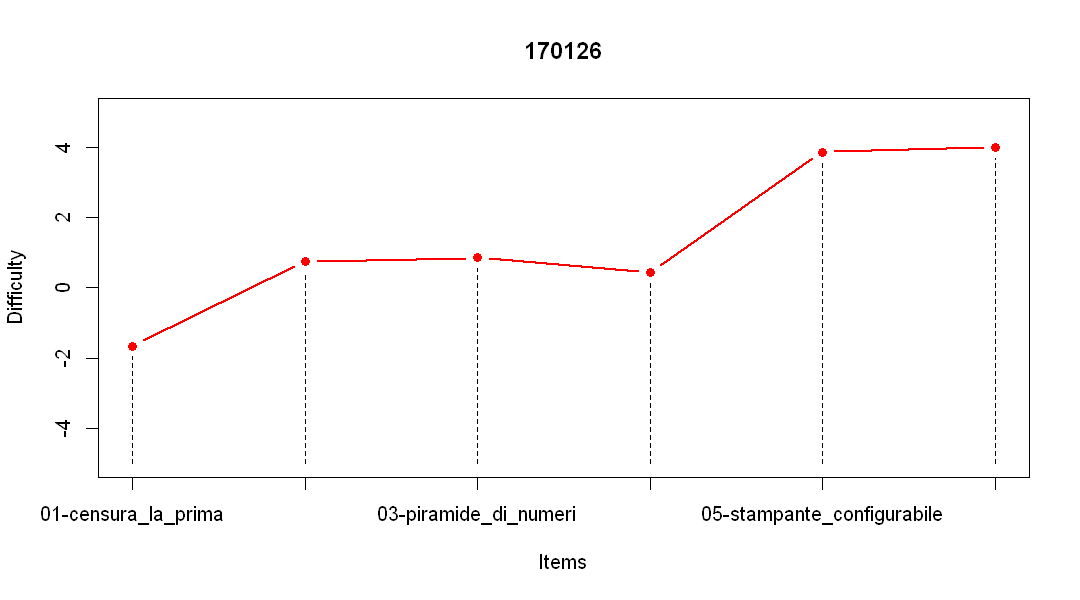

In [182]:
numSessions <- 1
session <- sessions[numSessions]

evalWithTestCase <- evaluateSource(session, vote = "testCase", percTestCaseOk = 0.5)

cat("La stima delle difficoltà rileva problemi di convergenza, in quanto è possibile rilevare colonne in cui la presenza di 0 
è totale o quasi, come mostrato di seguito:")

evalWithTestCase

diffTestCase <- estimateDifficultiesDichotOneDiscrim(bootstrapping(evalWithTestCase, n = bootstrapVal * nStud))

cat("\n\n\nNonostante il warning generato la funzione effettua ugualmente una stima delle difficoltà, se essa è stata effettuata 
su dati con una bassissima diversificazione potrebbe essere poco precisa, nel caso invece che i dati fossero totalmente 
uniformi riscontreremmo valori di -26 e 26 ad indicare la totale possibilità di superare l'esercizio e l'assoluta 
impossibilità di superarlo")

diffTestCase

diffTestCase <- regulateRange(diffTestCase, min = -4, max = 4)

cat("\n\n\nDal grafico possiamo notare un aumento costante della difficoltà degli esercizi, fino a giungere a stime 
che presupporrebbero una impossibilità totale a superare gli ultimi")

plotDifficultiesDichot(evalWithTestCase, diffTestCase, name = session)

La stima delle difficoltà rileva anche in questo caso problemi di convergenza anche se in misura minore rispetto 
al precedente caso, ciò è visibile anche da una minore uniformità dei risultati

,01-abbastanza_risparmi,02-parole_incatenate,03-u_inscatolate,04-nave_piu_lunga,05-tra_parentesi,06-distesa_di_piramidi
840537,1,1,1,0,0,0
871370,0,0,0,0,0,0
871392,1,1,1,1,0,0
871599,0,0,0,0,0,0
871631,1,1,1,0,0,0
871769,1,1,0,0,0,0
872010,1,1,1,1,0,0
872868,0,0,0,0,0,0
872974,1,1,0,0,1,0
873489,1,1,1,0,1,0


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"




 In questo caso l'uso della funzione regulateRange non è necessario

[1] -1.9748280 -1.2086189 -0.4168101  1.0311477  0.9581863  1.5028442




Anche ora possiamo notare un andamento crescente delle difficoltà, potremmo presuppore che il professore 
assegni gli esercizi in esame mostrando prima quelli più semplici e veloci da superare e lasciando per ultimi quelli 
che richiedo più tempo e impegno

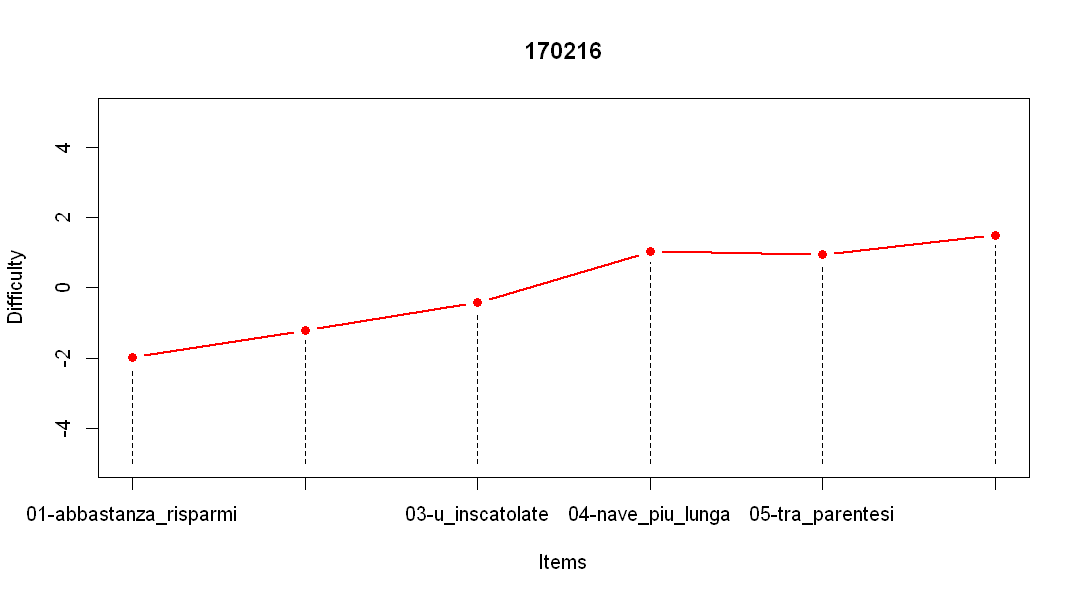

In [184]:
numSessions <- 2
session <- sessions[numSessions]

evalWithTestCase <- evaluateSource(session, vote = "testCase", percTestCaseOk = 0.5)

cat("La stima delle difficoltà rileva anche in questo caso problemi di convergenza anche se in misura minore rispetto 
al precedente caso, ciò è visibile anche da una minore uniformità dei risultati")

evalWithTestCase

diffTestCase <- estimateDifficultiesDichotOneDiscrim(bootstrapping(evalWithTestCase, n = bootstrapVal * nStud))

cat("\n\n\n In questo caso l'uso della funzione regulateRange non è necessario")

diffTestCase

cat("\n\n\nAnche ora possiamo notare un andamento crescente delle difficoltà, potremmo presuppore che il professore 
assegni gli esercizi in esame mostrando prima quelli più semplici e veloci da superare e lasciando per ultimi quelli 
che richiedo più tempo e impegno")

plotDifficultiesDichot(evalWithTestCase, diffTestCase, name = session)

Dall'osservazione della tabella derivante dall'osservazione dei risultati, imponendo una soglia di superamento 
degli esercizi pari al superamento di almeno il 50% dei test case, pare evidente l'impossibilità di giungere ad una
convergenza per l'algoritmo di stima, in quanto il secondo esercizio non è stato superato da nemmeno uno studente, 
penultimo da solo uno e l'ultimo da due studenti

,01-parole_graziose,02-pipe,03-mat_max_min,04-jugs,05-prodotto_di_matrici,06-calcolatrice_senza_tasti
859927,1,0,1,0,0,0
871370,1,0,0,0,0,0
871599,1,0,1,0,0,0
871740,1,0,1,0,0,0
872974,1,0,1,0,0,0
874343,1,0,1,1,0,1
885552,1,0,1,1,0,0
885732,1,0,1,1,0,0
886228,1,0,0,0,0,1
886435,1,0,1,1,1,0


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"




 In questo caso l'uso della funzione regulateRange torna necessaria

[1] -2.2517109  4.0000000 -1.0199597  0.6302609  2.5202551  1.8112491




 A causa della strana distribuzione dei dati non siamo in grado di affermare se la difficoltà degli esercizi
segue ancora un andamento crescente con il numero dell'esercizio

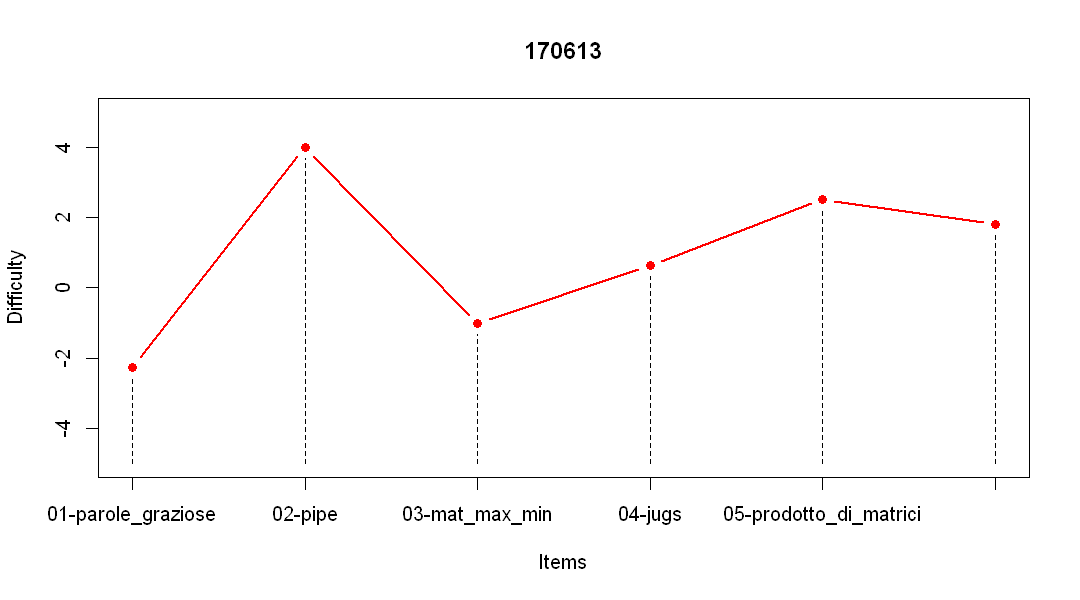

In [196]:
numSessions <- 3
session <- sessions[numSessions]

evalWithTestCase <- evaluateSource(session, vote = "testCase", percTestCaseOk = 0.5)

cat("Dall'osservazione della tabella derivante dall'osservazione dei risultati, imponendo una soglia di superamento 
degli esercizi pari al superamento di almeno il 50% dei test case, pare evidente l'impossibilità di giungere ad una
convergenza per l'algoritmo di stima, in quanto il secondo esercizio non è stato superato da nemmeno uno studente, 
penultimo da solo uno e l'ultimo da due studenti")

evalWithTestCase

diffTestCase <- estimateDifficultiesDichotOneDiscrim(bootstrapping(evalWithTestCase, n = bootstrapVal * nStud))

cat("\n\n\n In questo caso l'uso della funzione regulateRange torna necessaria")

diffTestCase <- regulateRange(diffTestCase, min = -4, max = 4)

diffTestCase 

cat("\n\n\n A causa della strana distribuzione dei dati non siamo in grado di affermare se la difficoltà degli esercizi
segue ancora un andamento crescente con il numero dell'esercizio")

plotDifficultiesDichot(evalWithTestCase, diffTestCase, name = session)

Similmente al caso precedente i dati presentano ben 3 colonne totalmente uniforme di 0, causando nuovamente una mancanza
della convergenza dei dati

,01-fizzbuzz,02-disegna_spirale,03-saltapicchio,04-condensa_parole,05-numeri_scala,06-nave_spaziale
828165,1,0,1,0,0,0
830693,1,0,1,0,1,0
859927,1,0,1,0,1,0
871370,1,0,1,0,0,0
871599,1,0,1,0,0,0
873523,1,0,1,0,0,0
874225,0,0,0,0,0,0
886228,1,0,1,0,0,0
895740,1,0,1,0,0,0
897698,1,0,1,0,0,0


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"




 La funzione regulateRange è necessaria

[1] -2.195142  4.000000 -2.195142  4.000000  1.576003  4.000000

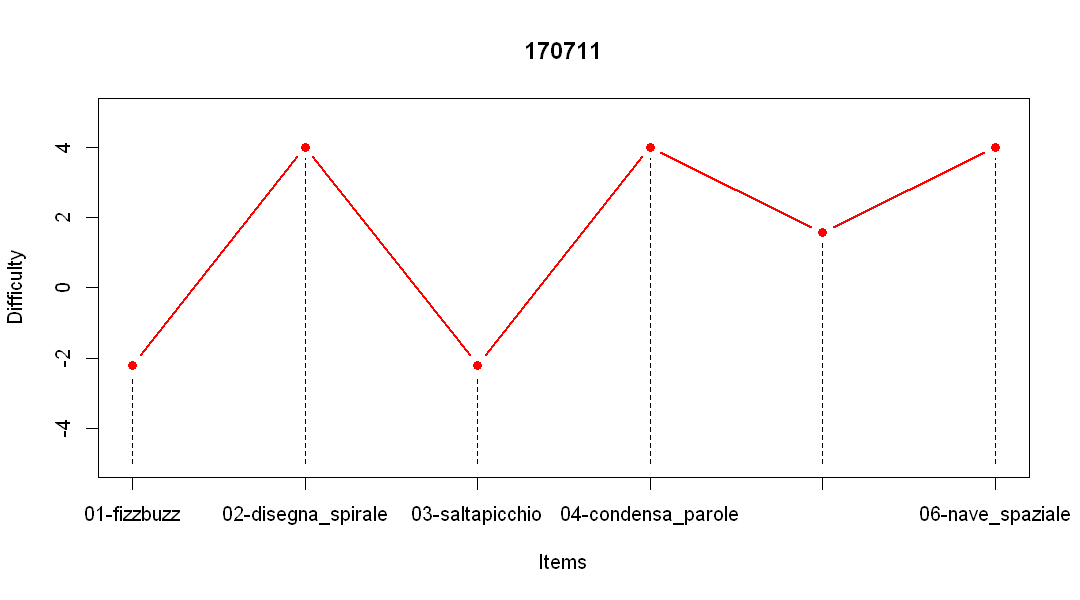

In [197]:
numSessions <- 4
session <- sessions[numSessions]

evalWithTestCase <- evaluateSource(session, vote = "testCase", percTestCaseOk = 0.5)

cat("Similmente al caso precedente i dati presentano ben 3 colonne totalmente uniforme di 0, causando nuovamente una mancanza
della convergenza dei dati")

evalWithTestCase

diffTestCase <- estimateDifficultiesDichotOneDiscrim(bootstrapping(evalWithTestCase, n = bootstrapVal * nStud))

cat("\n\n\n La funzione regulateRange è necessaria")

diffTestCase <- regulateRange(diffTestCase, min = -4, max = 4)

diffTestCase 

plotDifficultiesDichot(evalWithTestCase, diffTestCase, name = session)

In [194]:
numSessions <- 5
session <- sessions[numSessions]

evalWithTestCase <- evaluateSource(session, vote = "testCase", percTestCaseOk = 0.5)

cat("In quest'ultimo caso di esame ho ritenuto superfluo il tentativo di stimare le difficoltà a causa nuovamente della 
presenza di 3 colonne totalmente assenti di esercizi superati e per la presenza di solamente 4 studenti, anche applicando
il bootstrapping, e ottenendo centinaia di elementi, i soggetti rimarrebbere ugualmente 4 e quindi troppo pochi per poter 
ottenere stime corrette")

evalWithTestCase

In quest'ultimo caso di esame ho ritenuto superfluo il tentativo di stimare le difficoltà a causa nuovamente della 
presenza di 3 colonne totalmente assenti di esercizi superati e per la presenza di solamente 4 studenti, anche applicando
il bootstrapping, e ottenendo centinaia di elementi, i soggetti rimarrebbere ugualmente 4 e quindi troppo pochi per poter 
ottenere stime corrette

,01-estate_torrida,02-cifra_piu_frequente,03-disegna_denti_di_sega,04-numeri_fortunati,05-automa_cellulare,06-discesa_rapida
830693,1,1,1,0,0,0
886228,1,1,1,0,0,0
886965,0,0,0,0,0,0
894114,1,1,1,0,0,0


Visualizzo e confronto i grafici relativi alle difficoltà stimate tenendo conto: se è stato effettuato l'upload,
se compila, se sono stati commessi meno di 2 errori di esecuzione e se almeno il 50% dei test case sono corretti

L'elevato numero di studenti (46) permette di avere una buona fiducia nei dati ottenuti

Dal grafico si possono trarre diverse conclusioni: 
    - le stime legate all'upload, compilazione ed errori in esecuzione coincidono quasi sempre, da ciò deduciamo che gli 
      studenti che consegnano gli esercizi lo fanno solo nel caso compilino e abbiano pochi errori di esecuzione o nessuno 
    - le difficoltà hanno un andamento crescente, quindi il professore potrebbe aver assegnato gli esercizi considerando
      che gli studenti avrebbero dovuto impegnarsi maggiormente negli ultimi
    - Nella fase iniziale la stima per test case si discosta abbastanza dalle altre, sovrapponendosi ad essi successivamente,
      questo potrebbe essere indicativo del fatto che gli stud

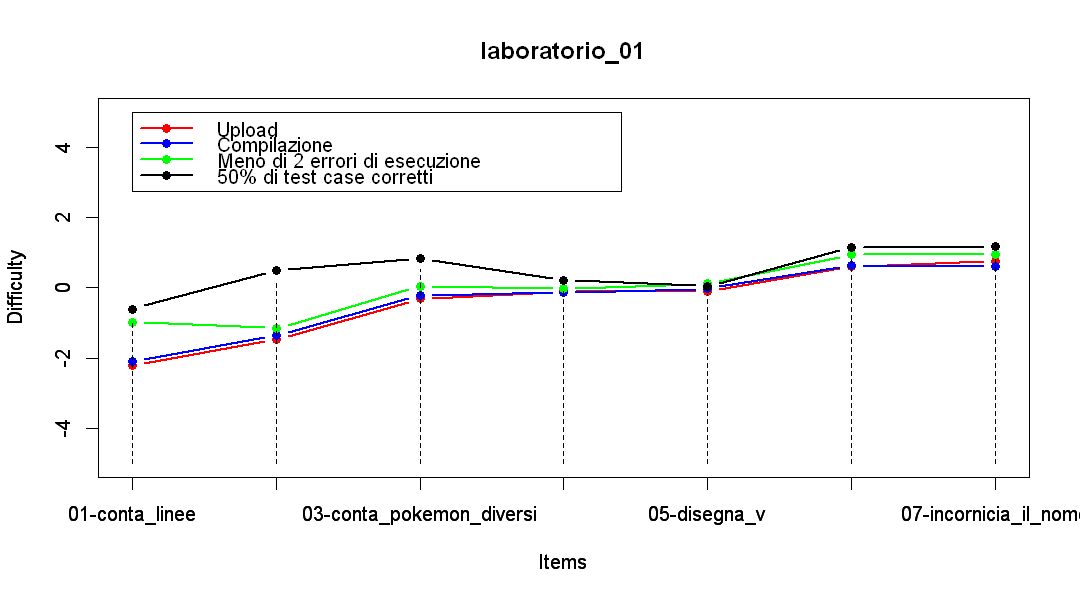

In [210]:
numSessions <- 6 
session <- sessions[numSessions]

evalWithUpload   <- evaluateSource(session, vote = "uploaded")
evalWithCompiles <- evaluateSource(session, vote = "compiles")
evalWithErrors   <- evaluateSource(session, vote = "errors", maxError = 2)
evalWithTestCase <- evaluateSource(session, vote = "testCase", percTestCaseOk = 0.5)

nStud <- nrow(evalWithTestCase)

diffUpload   <- estimateDifficultiesDichotOneDiscrim(bootstrapping(evalWithUpload,   n = bootstrapVal * nStud))
diffCompiles <- estimateDifficultiesDichotOneDiscrim(bootstrapping(evalWithCompiles, n = bootstrapVal * nStud))
diffErrors   <- estimateDifficultiesDichotOneDiscrim(bootstrapping(evalWithErrors,   n = bootstrapVal * nStud))
diffTestCase <- estimateDifficultiesDichotOneDiscrim(bootstrapping(evalWithTestCase, n = bootstrapVal * nStud))

cat("Visualizzo e confronto i grafici relativi alle difficoltà stimate tenendo conto: se è stato effettuato l'upload,
se compila, se sono stati commessi meno di 2 errori di esecuzione e se almeno il 50% dei test case sono corretti")

plotDifficultiesDichot(evalWithUpload, diffUpload, color = "red", name = session)
par(new = TRUE)
plotDifficultiesDichot(evalWithCompiles, diffCompiles, color = "blue", name = "")
par(new = TRUE)
plotDifficultiesDichot(evalWithErrors, diffErrors, color = "green", name = "")
par(new = TRUE)
plotDifficultiesDichot(evalWithTestCase, diffTestCase, color = "black", name = "")
legend(1, 10, legend=c("Upload", "Compilazione", "Meno di 2 errori di esecuzione", "50% di test case corretti"), col=c("red", "blue", "green", "black"), lty=1, cex=1, lwd=2, pch=16)

cat("\n\nL'elevato numero di studenti (46) permette di avere una buona fiducia nei dati ottenuti")

cat("\n\nDal grafico si possono trarre diverse conclusioni: 
    - le stime legate all'upload, compilazione ed errori in esecuzione coincidono quasi sempre, da ciò deduciamo che gli 
      studenti che consegnano gli esercizi lo fanno solo nel caso compilino e abbiano pochi errori di esecuzione o nessuno 
    - le difficoltà hanno un andamento crescente, quindi il professore potrebbe aver assegnato gli esercizi considerando
      che gli studenti avrebbero dovuto impegnarsi maggiormente negli ultimi
    - Nella fase iniziale la stima per test case si discosta abbastanza dalle altre, sovrapponendosi ad essi successivamente,
      questo potrebbe essere indicativo del fatto che gli studenti all'inizio erano meno abili, forse a causa di spiegazioni 
      poco chiare da parte del professore")


Anche nel laboratorio 2 si può notare una sovrapposizione tra le stime considerando la presenza di meno di 2 errori di 
esecuzione e il raggiungimento di almeno il 50% di test case corretti ma a differenza del precedente grafico questo
non ha un andamento particolarmente crescente, anzi, è quasi sempre fisso su una difficoltà medio-alta, da ciò possiamo
dedurre che gli studenti hanno avuto particolari difficoltà in tutto gli esercizi, scontrandoci con l'ipotesi formulata al 
punto precedente sul crescente livello di difficoltà pensato dal professore all'interno dei laboratori

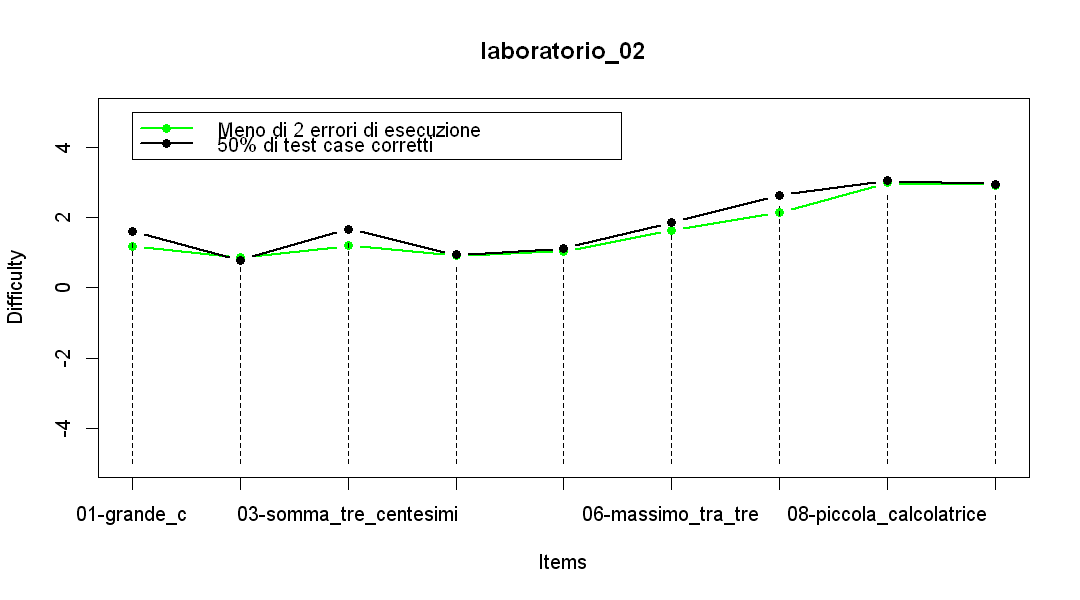

In [213]:
numSessions <- 7
session <- sessions[numSessions]

evalWithErrors   <- evaluateSource(session, vote = "errors", maxError = 2)
evalWithTestCase <- evaluateSource(session, vote = "testCase", percTestCaseOk = 0.5)

nStud <- nrow(evalWithTestCase)

diffErrors   <- estimateDifficultiesDichotOneDiscrim(bootstrapping(evalWithErrors,   n = bootstrapVal * nStud))
diffTestCase <- estimateDifficultiesDichotOneDiscrim(bootstrapping(evalWithTestCase, n = bootstrapVal * nStud))

plotDifficultiesDichot(evalWithErrors, diffErrors, color = "green", name = session)
par(new = TRUE)
plotDifficultiesDichot(evalWithTestCase, diffTestCase, color = "black", name = "")
legend(1, 10, legend=c("Meno di 2 errori di esecuzione", "50% di test case corretti"), col=c("green", "black"), lty=1, cex=1, lwd=2, pch=16)

cat("\nAnche nel laboratorio 2 si può notare una sovrapposizione tra le stime considerando la presenza di meno di 2 errori di 
esecuzione e il raggiungimento di almeno il 50% di test case corretti ma a differenza del precedente grafico questo
non ha un andamento particolarmente crescente, anzi, è quasi sempre fisso su una difficoltà medio-alta, da ciò possiamo
dedurre che gli studenti hanno avuto particolari difficoltà in tutto gli esercizi, scontrandoci con l'ipotesi formulata al 
punto precedente sul crescente livello di difficoltà pensato dal professore all'interno dei laboratori")

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Nel laboratorio 3 notiamo che la difficoltà stimata si assesta per tutti gli esercizi su un livello medio-basso 
con una leggere crescita verso gli ultimi

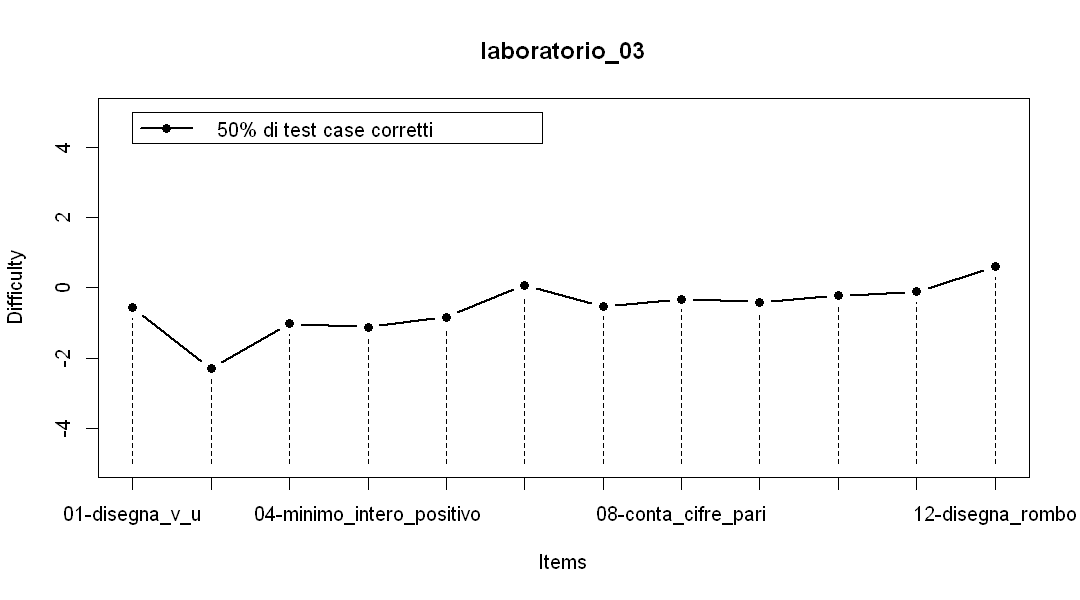

In [220]:
numSessions <- 8
session <- sessions[numSessions]

evalWithTestCase <- evaluateSource(session, vote = "testCase", percTestCaseOk = 0.5)

nStud <- nrow(evalWithTestCase)
diffTestCase <- estimateDifficultiesDichotOneDiscrim(bootstrapping(evalWithTestCase, n = bootstrapVal * nStud))

plotDifficultiesDichot(evalWithTestCase, diffTestCase, color = "black", name = session)
legend(1, 10, legend=c("50% di test case corretti"), col=c("black"), lty=1, cex=1, lwd=2, pch=16)

cat("\nNel laboratorio 3 notiamo che la difficoltà stimata si assesta per tutti gli esercizi su un livello medio-basso 
con una leggere crescita verso gli ultimi")

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Nel laboratorio 4 notiamo che la difficoltà stimata ottiene un andamento molto crescente, con un primo eserzio 
di difficoltà minima, quasi impossibili da fallire, e un picco sul penultimo eserczio di difficoltà molto elevata

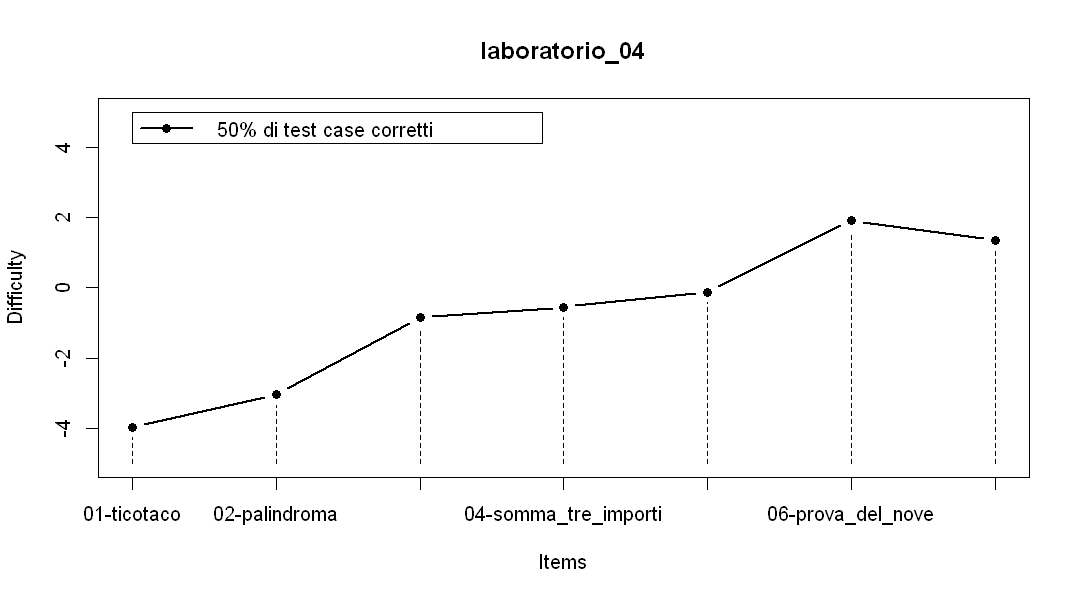

In [225]:
numSessions <- 9
session <- sessions[numSessions]

evalWithTestCase <- evaluateSource(session, vote = "testCase", percTestCaseOk = 0.5)

nStud <- nrow(evalWithTestCase)
diffTestCase <- estimateDifficultiesDichotOneDiscrim(bootstrapping(evalWithTestCase, n = bootstrapVal * nStud))

plotDifficultiesDichot(evalWithTestCase, diffTestCase, color = "black", name = session)
legend(1, 10, legend=c("50% di test case corretti"), col=c("black"), lty=1, cex=1, lwd=2, pch=16)

cat("\nNel laboratorio 4 notiamo che la difficoltà stimata ottiene un andamento molto crescente, con un primo eserzio 
di difficoltà minima, quasi impossibili da fallire, e un picco sul penultimo eserczio di difficoltà molto elevata")

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Nel laboratorio 5 notiamo che la difficoltà stimata ha un andamento costante per quasi tutti gli esercizi, con un 
leggero incremento sull'ultimo

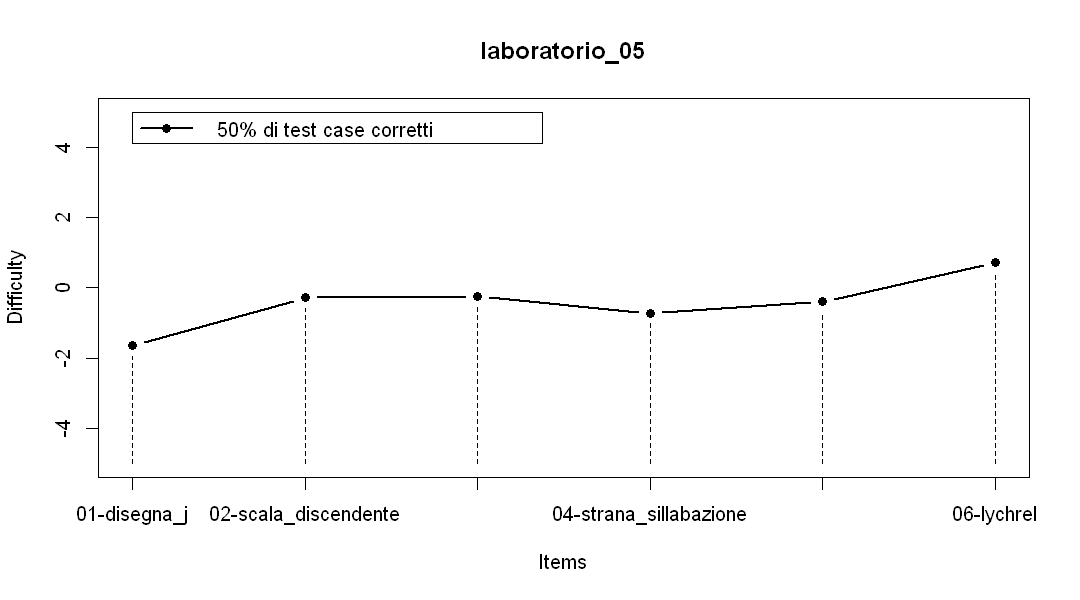

In [228]:
numSessions <- 10
session <- sessions[numSessions]

evalWithTestCase <- evaluateSource(session, vote = "testCase", percTestCaseOk = 0.5)

nStud <- nrow(evalWithTestCase)
diffTestCase <- estimateDifficultiesDichotOneDiscrim(bootstrapping(evalWithTestCase, n = bootstrapVal * nStud))

plotDifficultiesDichot(evalWithTestCase, diffTestCase, color = "black", name = session)
legend(1, 10, legend=c("50% di test case corretti"), col=c("black"), lty=1, cex=1, lwd=2, pch=16)

cat("Nel laboratorio 5 notiamo che la difficoltà stimata ha un andamento costante per quasi tutti gli esercizi, con un 
leggero incremento sull'ultimo")

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Nel laboratorio 6 notiamo che la difficoltà stimata ha un andamento crescente con qualche diminuzione ma non abbastanza
significativa da negare l'esistenza di un aumento di difficoltà in relazione al numero dell'esercizio

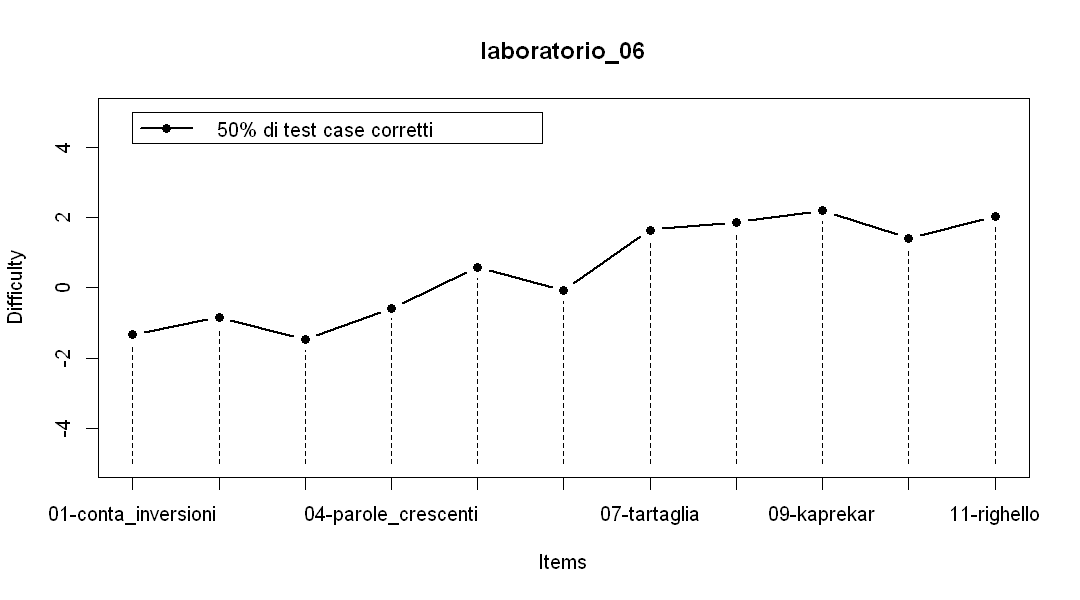

In [231]:
numSessions <- 11
session <- sessions[numSessions]

evalWithTestCase <- evaluateSource(session, vote = "testCase", percTestCaseOk = 0.5)

nStud <- nrow(evalWithTestCase)
diffTestCase <- estimateDifficultiesDichotOneDiscrim(bootstrapping(evalWithTestCase, n = bootstrapVal * nStud))

plotDifficultiesDichot(evalWithTestCase, diffTestCase, color = "black", name = session)
legend(1, 10, legend=c("50% di test case corretti"), col=c("black"), lty=1, cex=1, lwd=2, pch=16)

cat("\nNel laboratorio 6 notiamo che la difficoltà stimata ha un andamento crescente con qualche diminuzione ma non abbastanza
significativa da negare l'esistenza di un aumento di difficoltà in relazione al numero dell'esercizio")

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Nel laboratorio 7 notiamo un incremento di difficoltà molto elevato che produce molti problemi sulla convergenza 
dell'algoritmo di stima ma che possiamo giustificare osservando il numero di persone che hanno superato gli ultimi esercizi
rispetto al totale degli studenti

[1] "Numero di studenti: 35 ; Esercizio: 09-pila_di_stringhe ; Numero di esercizi passati: 2 ; Percentuale di passati: 5.71 %"

[1] "Numero di studenti: 35 ; Esercizio: 10-due_alla ; Numero di esercizi passati: 2 ; Percentuale di passati: 5.71 %"

[1] "Numero di studenti: 35 ; Esercizio: 11-frazioni_continue ; Numero di esercizi passati: 3 ; Percentuale di passati: 8.57 %"

[1] "Numero di studenti: 35 ; Esercizio: 12-visualizza_hanoi ; Numero di esercizi passati: 2 ; Percentuale di passati: 5.71 %"

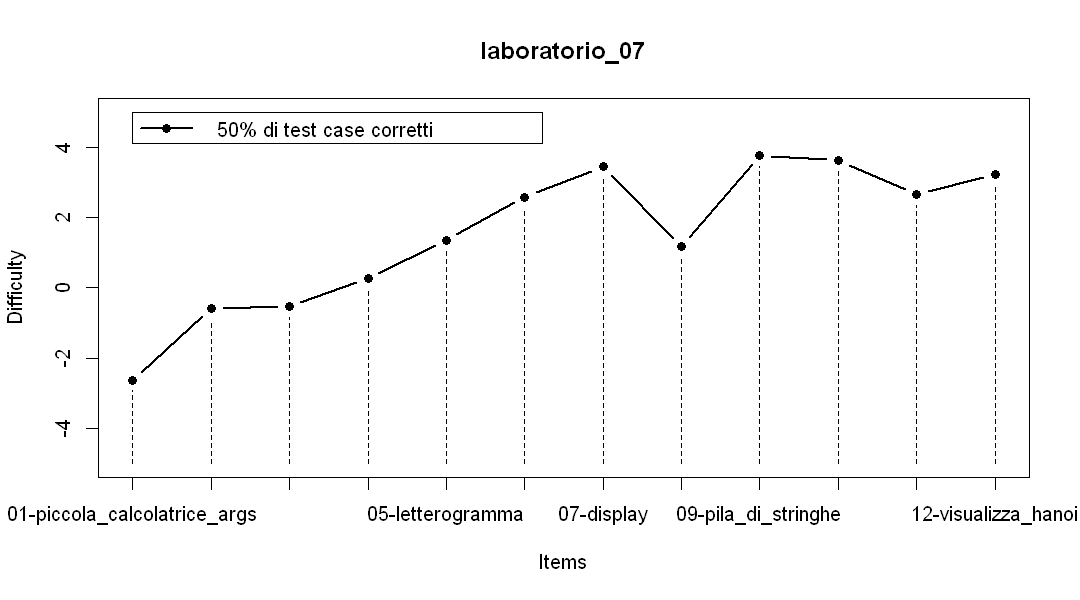

In [235]:
numSessions <- 12
session <- sessions[numSessions]

evalWithTestCase <- evaluateSource(session, vote = "testCase", percTestCaseOk = 0.5)

nStud <- nrow(evalWithTestCase)
diffTestCase <- estimateDifficultiesDichotOneDiscrim(bootstrapping(evalWithTestCase, n = bootstrapVal * nStud))

plotDifficultiesDichot(evalWithTestCase, diffTestCase, color = "black", name = session)
legend(1, 10, legend=c("50% di test case corretti"), col=c("black"), lty=1, cex=1, lwd=2, pch=16)

cat("Nel laboratorio 7 notiamo un incremento di difficoltà molto elevato che produce molti problemi sulla convergenza 
dell'algoritmo di stima ma che possiamo giustificare osservando il numero di persone che hanno superato gli ultimi esercizi
rispetto al totale degli studenti")

showRispPercStud <- function(tab, ex) {  
    studTot <- nrow(tab)
    numRisp <- sum(tab[,ex])
    perc <- round(numRisp/studTot*100, digits = 2)
    
    paste("Numero di studenti:", studTot, "; Esercizio:", ex,"; Numero di esercizi passati:", numRisp, "; Percentuale di passati:", perc, "%")   
}

showRispPercStud(evalWithTestCase, "09-pila_di_stringhe")
showRispPercStud(evalWithTestCase, "10-due_alla")
showRispPercStud(evalWithTestCase, "11-frazioni_continue")
showRispPercStud(evalWithTestCase, "12-visualizza_hanoi")